**OBJECTIVE**
* Improve customer experience by analysing sales data
* Increase revenue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.ticker import PercentFormatter

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df_sales_data = df.copy()
df_sales_data

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [7]:
df_sales_data.drop(["Status","unnamed1"], axis = 1, inplace = True)
# inplace is used to save the data what we are doing without assiginig it 

In [8]:
df_sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
# check whether we have null values or not
pd.isnull(df_sales_data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
df_sales_data.shape

(11251, 13)

In [11]:
df_sales_data.dropna(inplace = True)

In [12]:
df_sales_data.shape

(11239, 13)

In [13]:
# changing our dtype of amount col into int
df_sales_data['Amount'] = df_sales_data['Amount'].astype('int')

In [14]:
df_sales_data['Amount'].dtype

dtype('int32')

In [15]:
df_sales_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df_sales_data.describe()
# it returns description of the data 

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [17]:
df_sales_data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

**GENDER**

In [18]:
sns.set_palette('colorblind')

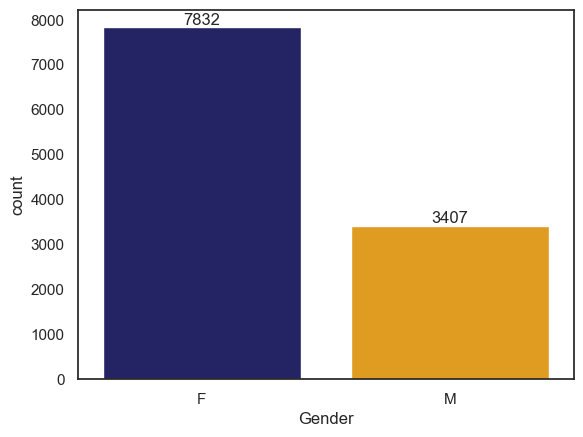

In [20]:
ax = sns.countplot(x = 'Gender', data = df_sales_data, palette = ['midnightblue','orange'] )
sns.set_style('white')
for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
df_sales_data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

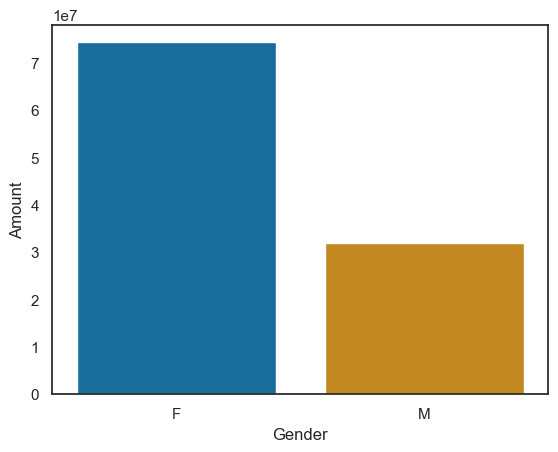

In [22]:
sales_gen = df_sales_data.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

***from the above graph most of the buyers are females and the purchasing power of female is greater than men***

**AGE**

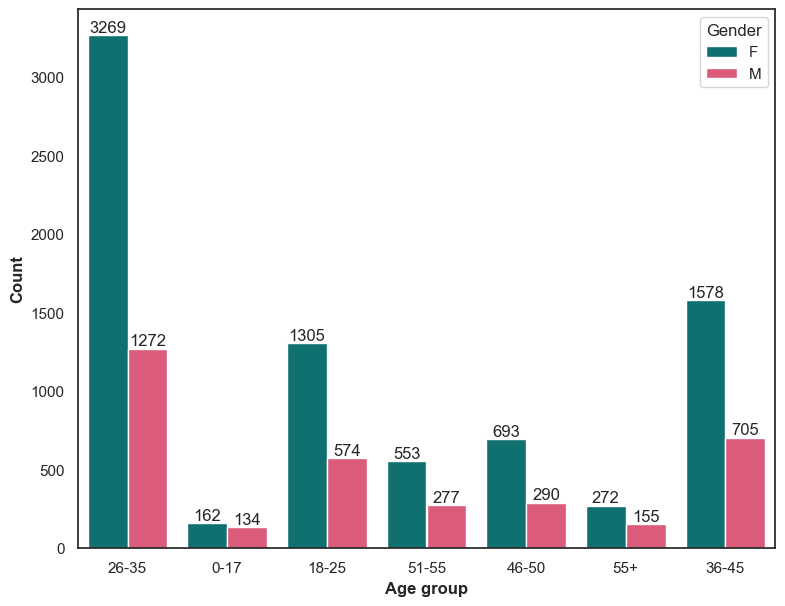

In [43]:
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df_sales_data, palette = ['teal','#EF476F'])

sns.set(rc = {'figure.figsize': (9,7)})
sns.set_style('white')
plt.xlabel("Age group", weight = 'bold')
plt.ylabel("Count", weight = 'bold')

for bars in ax.containers:
    ax.bar_label(bars)
    
    

<Axes: xlabel='Age Group', ylabel='Amount'>

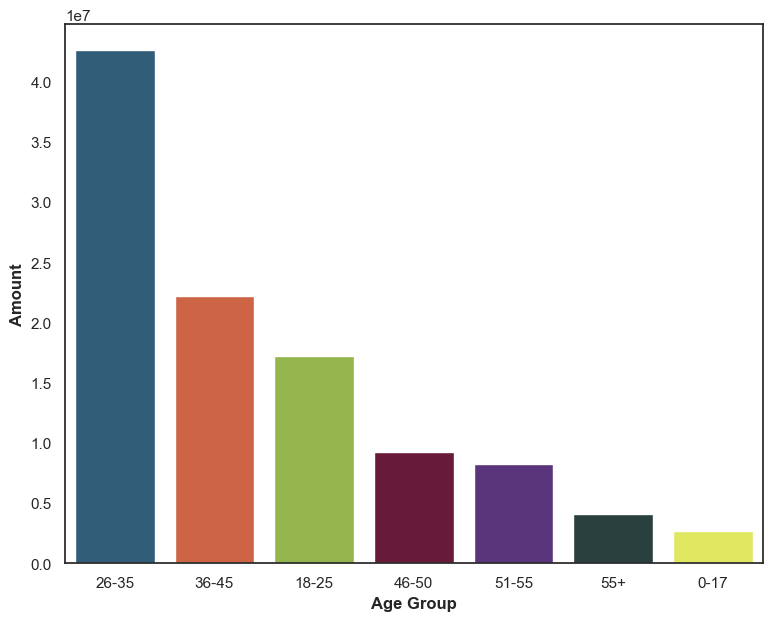

In [44]:
sales_age = df_sales_data.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize': (9,7)})
sns.set_style('white')
plt.xlabel("Age group", weight = 'bold')
plt.ylabel("Amount", weight = 'bold')


sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age, palette = ['#255F85','#E4572E','#9BC53D','#750D37','#5B2A86','#254441','#F2FF49'])

***from the above graph we can see that most of the buyers are of 26-35 Age Group of females***

**STATE**

<Axes: xlabel='State', ylabel='Orders'>

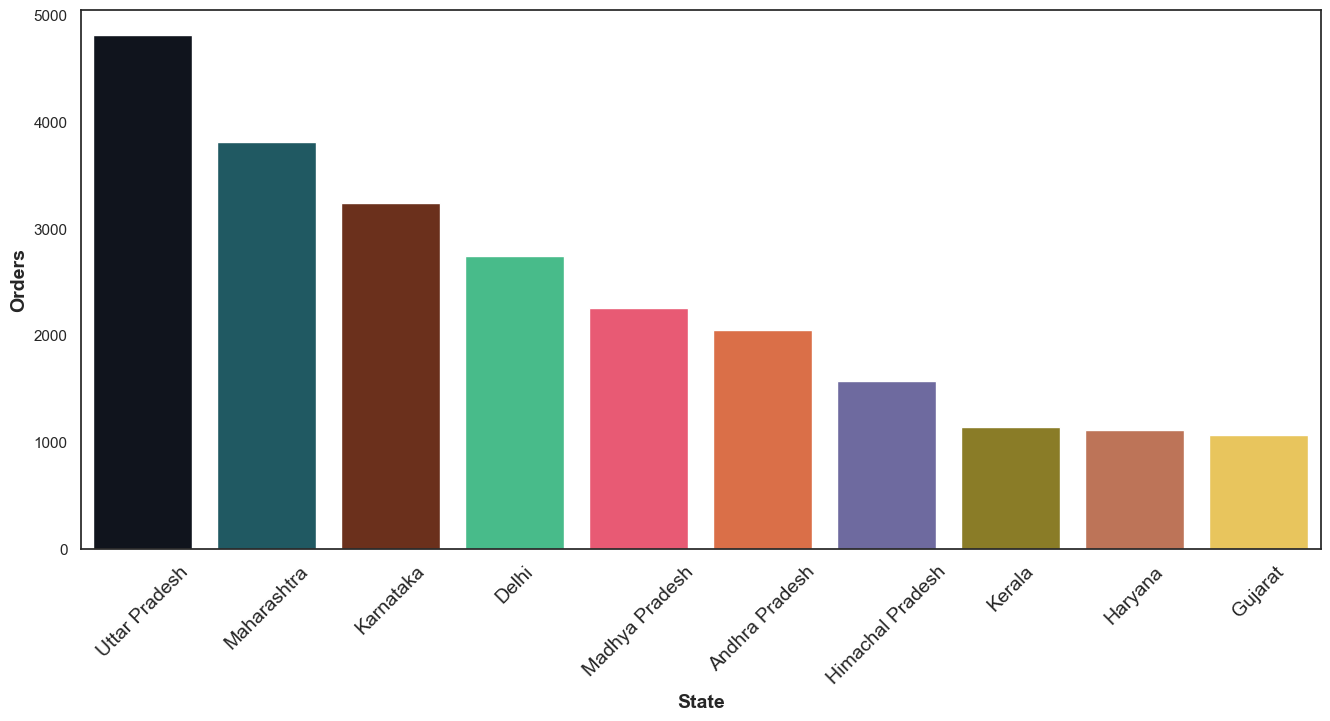

In [70]:
# total number of orders from top 10 states
sales_state = df_sales_data.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)


sns.set(rc = {'figure.figsize': (16,7)})
sns.set_style('white')
plt.xlabel("State", weight = 'bold', fontsize = 14)
plt.ylabel("Orders", weight = 'bold', fontsize = 14)
plt.xticks(rotation = 45, fontsize = 14)


sns.barplot(x = 'State', y = 'Orders', data = sales_state,
           palette = ['#0E131F','#15616D','#78290F','#35CE8D','#FF4365','#F26430','#6761A8','#9B8816','#CE6C47','#FFD046'])


<Axes: xlabel='State', ylabel='Amount'>

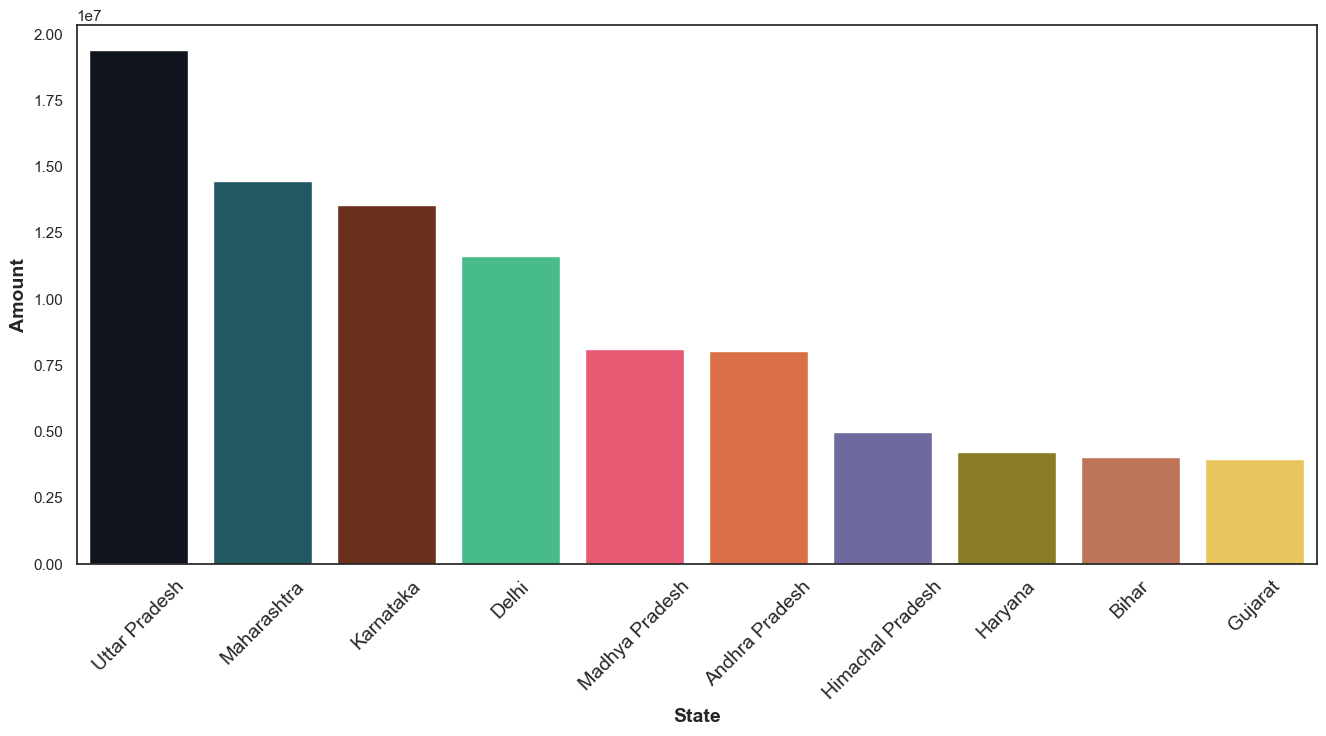

In [69]:
# total of amount from top 10 states
sales_state = df_sales_data.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (16,7)})
sns.set_style('white')
plt.xlabel("State", weight = 'bold', fontsize = 14)
plt.ylabel("Amount", weight = 'bold', fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)

sns.barplot(x = 'State', y = 'Amount', data = sales_state,
           palette = ['#0E131F','#15616D','#78290F','#35CE8D','#FF4365','#F26430','#6761A8','#9B8816','#CE6C47','#FFD046'])

***from the above graphs we can see that most of the orders are from UP, maharastra and karnataka and total amount also highest from UP, maharastra and karnataka***

**MARITAL STATUS**

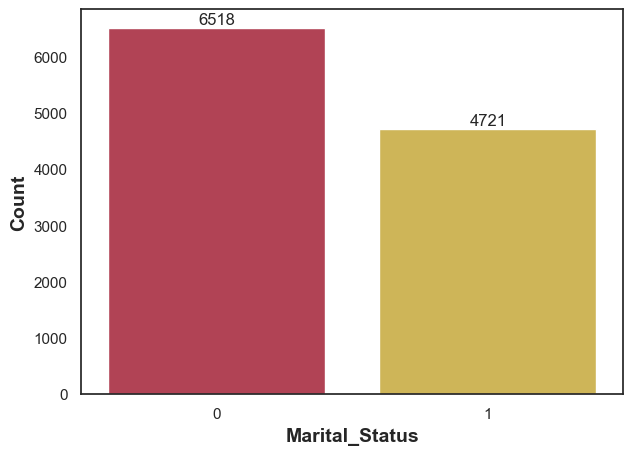

In [53]:
ax = sns.countplot(x = 'Marital_Status', data = df_sales_data, palette = ['#C33149','#E2C044'])

sns.set(rc = {'figure.figsize': (7,4)})
sns.set_style('white')
plt.xlabel("Marital_Status", weight = 'bold', fontsize = 14)
plt.ylabel("Count", weight = 'bold', fontsize = 14)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

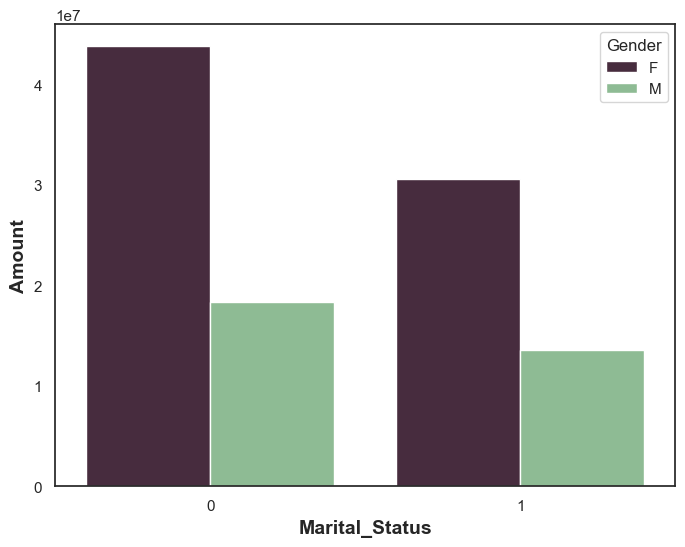

In [54]:
sales_state = df_sales_data.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (8,6)})
sns.set_style('white')
plt.xlabel("Marital_Status", weight = 'bold', fontsize = 14)
plt.ylabel("Amount", weight = 'bold', fontsize = 14)

sns.barplot(x = 'Marital_Status', y = 'Amount', data = sales_state, hue = 'Gender',
           palette = ['#4B2840','#87C38F'])

***from the above graphs we can see that most of the buyers are married(women) and they have more purchasing power***

**OCCUPATION**

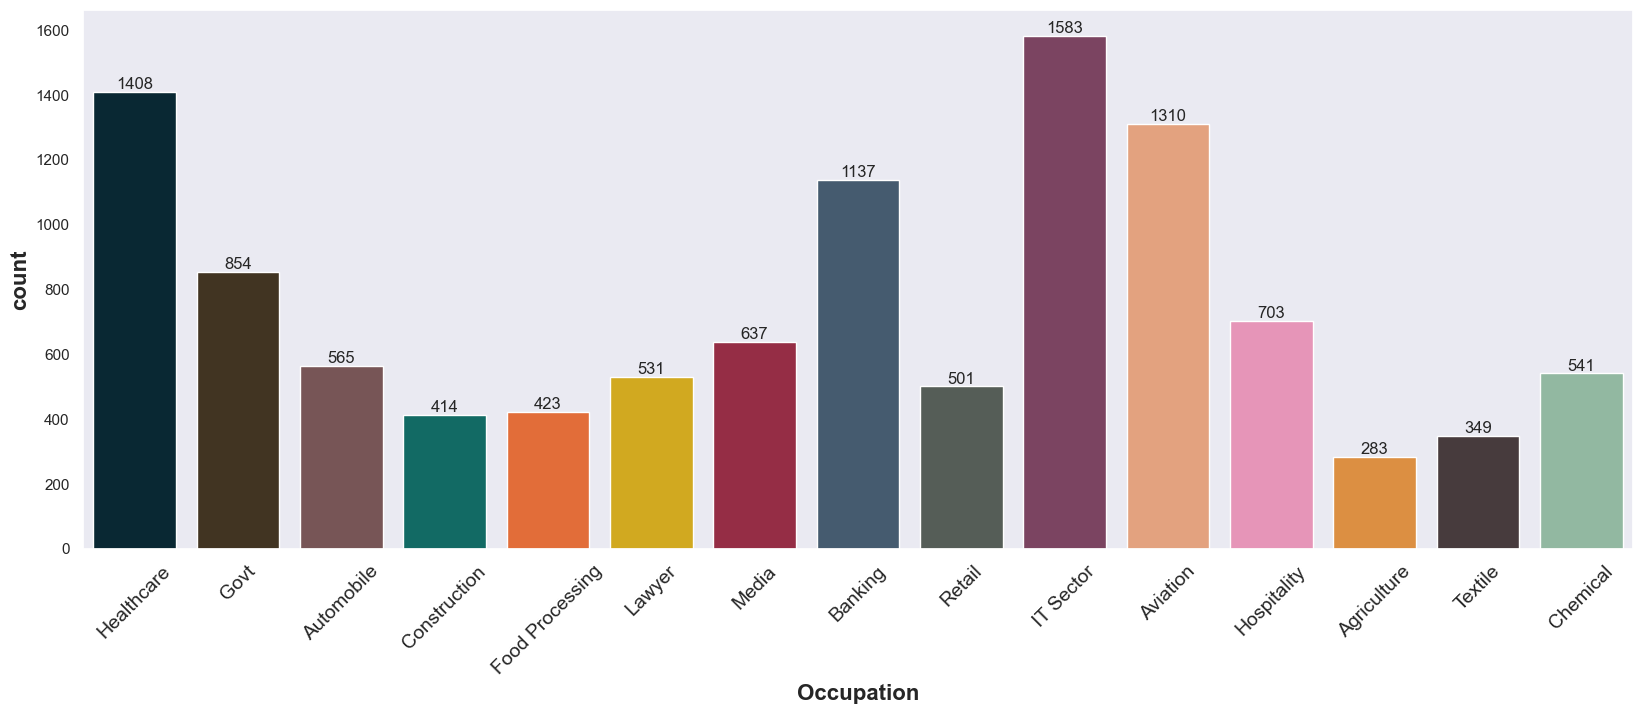

In [79]:
sns.set(rc = {'figure.figsize': (20,7)})

ax = sns.countplot(x = 'Occupation', data = df_sales_data,
                  palette = ['#022B3A','#46351D','#7D4F50','#037971','#FE621D',
                            '#EEB902','#A61C3C','#3E5C76','#545E56','#843B62',
                            '#F49D6E','#F487B6','#F58F29','#49393B','#8BBF9F'])
sns.axes_style('white', {'axes.grid': False})
ax.grid(False)

plt.xlabel("Occupation", weight = 'bold', fontsize = 16)
plt.ylabel("count", weight = 'bold', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 14)


for bars in ax.containers:
    ax.bar_label(bars)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Aviation'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt'),
  Text(5, 0, 'Hospitality'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Automobile'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Lawyer'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Food Processing'),
  Text(12, 0, 'Construction'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Agriculture')])

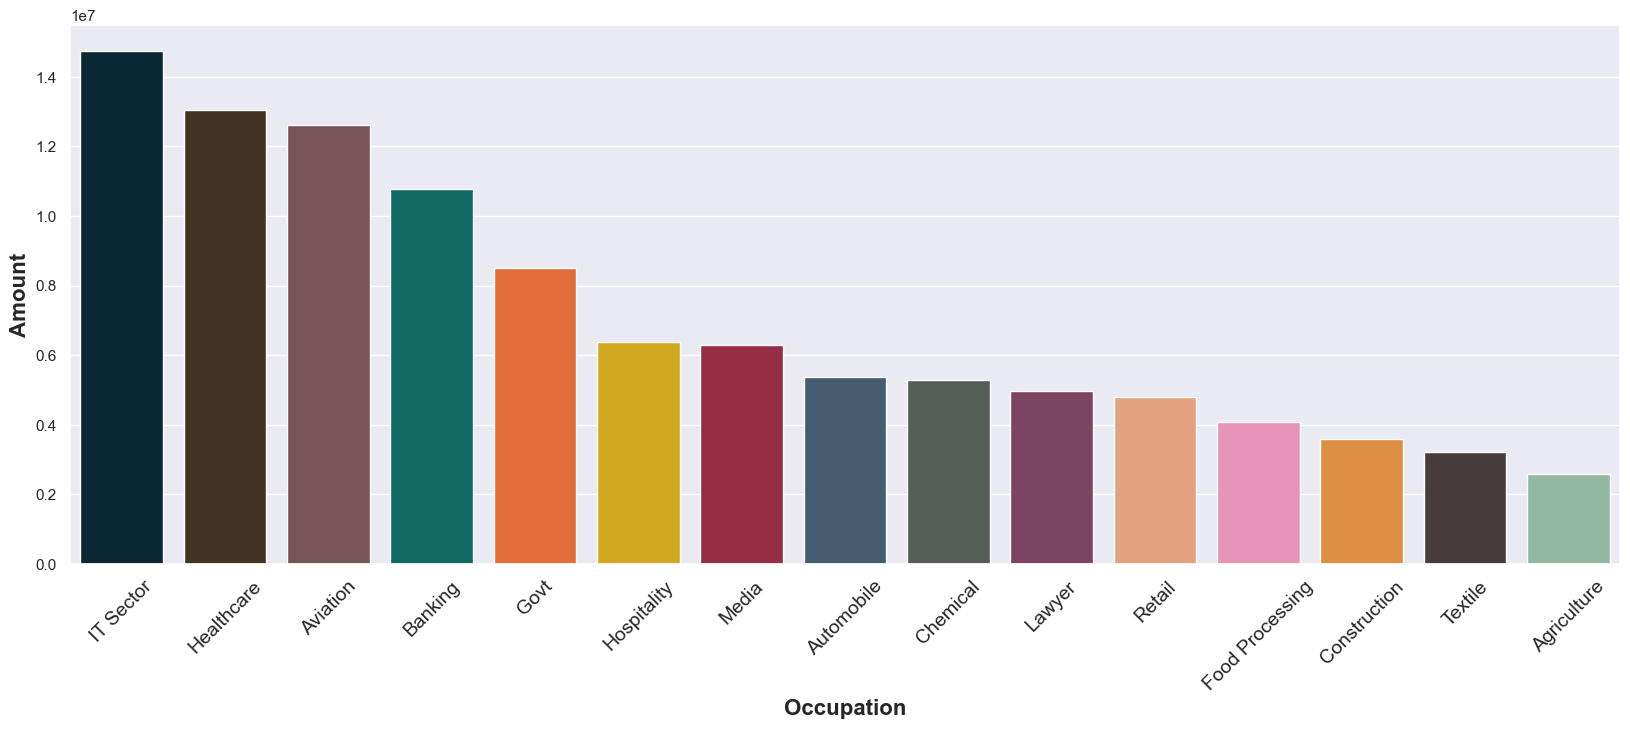

In [81]:
sales_occupation = df_sales_data.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize': (20,7)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occupation,
            palette = ['#022B3A','#46351D','#7D4F50','#037971','#FE621D',
                            '#EEB902','#A61C3C','#3E5C76','#545E56','#843B62',
                            '#F49D6E','#F487B6','#F58F29','#49393B','#8BBF9F'])
sns.set_style('white')

ax.grid(False)

plt.xlabel("Occupation", weight = 'bold', fontsize = 16)
plt.ylabel("Amount", weight = 'bold', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 14)


***from above graph we can see that most of the buyers are from IT sector, Aviation and Healthcare***

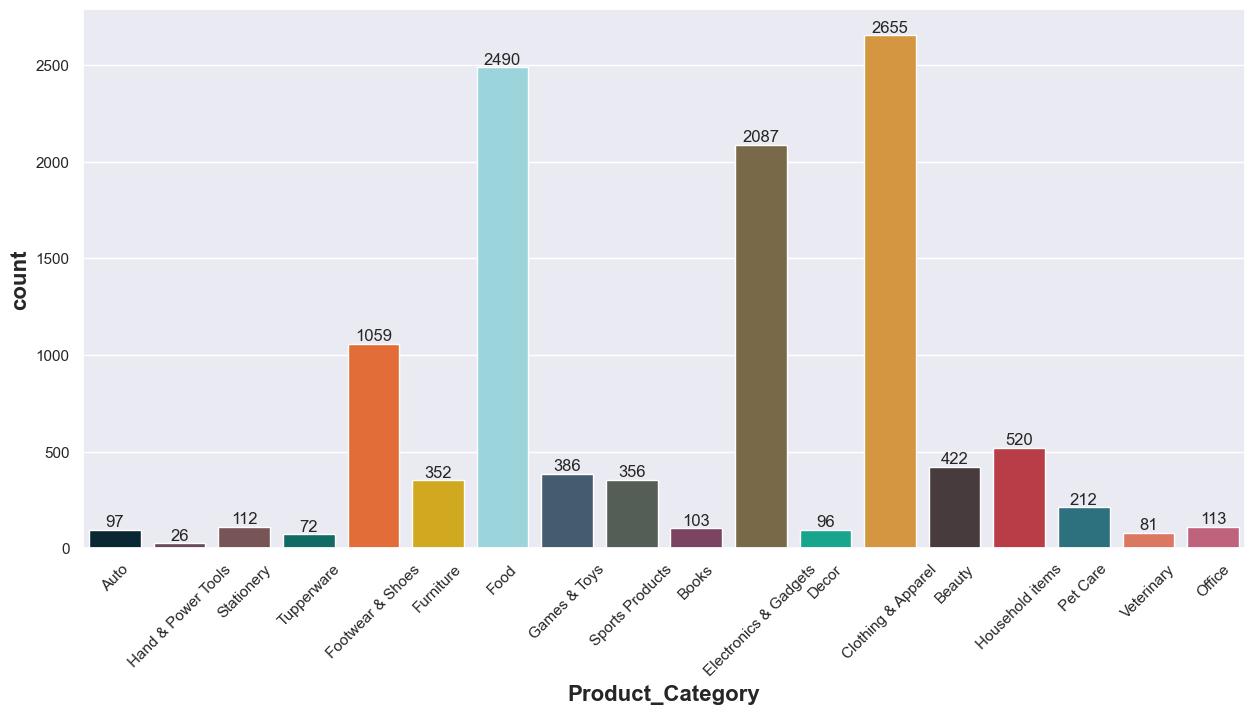

In [73]:
sns.set(rc = {'figure.figsize': (15,7)})

ax = sns.countplot(x = 'Product_Category', data = df_sales_data,
                  palette = ['#022B3A','#6D435A','#7D4F50','#037971','#FE621D',
                            '#EEB902','#92DCE5','#3E5C76','#545E56','#843B62',
                            '#806D40','#00BD9D','#EC9A29','#49393B','#CC2936','#1F7A8C','#EE6C4D','#CE5374'])
sns.set_style('white')
plt.xlabel("Product_Category", weight = 'bold', fontsize = 16)
plt.ylabel("count", weight = 'bold', fontsize = 16)
plt.xticks(rotation = 45)

for bars in ax.containers:
    ax.bar_label(bars)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Food'),
  Text(1, 0, 'Clothing & Apparel'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Furniture'),
  Text(5, 0, 'Games & Toys'),
  Text(6, 0, 'Sports Products'),
  Text(7, 0, 'Beauty'),
  Text(8, 0, 'Auto'),
  Text(9, 0, 'Stationery'),
  Text(10, 0, 'Household items'),
  Text(11, 0, 'Tupperware'),
  Text(12, 0, 'Books'),
  Text(13, 0, 'Decor'),
  Text(14, 0, 'Pet Care'),
  Text(15, 0, 'Hand & Power Tools'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

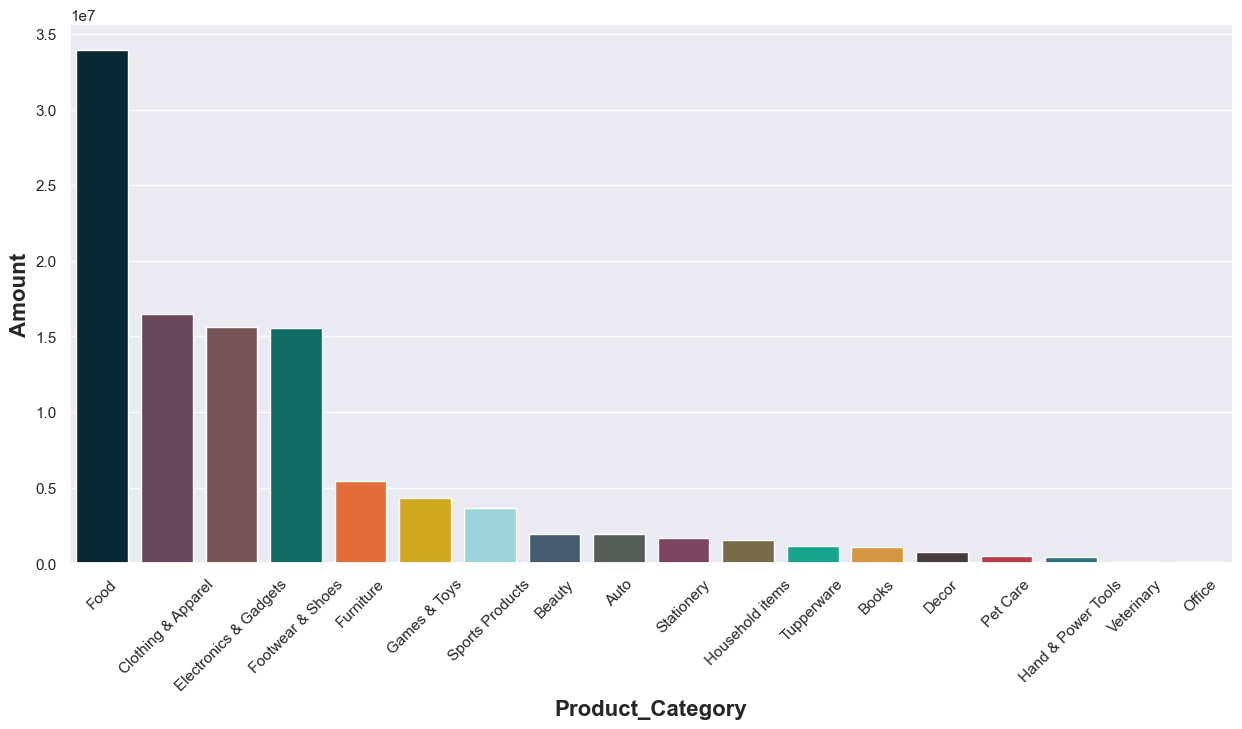

In [63]:
sales_occupation = df_sales_data.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.set(rc = {'figure.figsize': (15,7)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_occupation,
            palette = ['#022B3A','#6D435A','#7D4F50','#037971','#FE621D',
                            '#EEB902','#92DCE5','#3E5C76','#545E56','#843B62',
                            '#806D40','#00BD9D','#EC9A29','#49393B','#CC2936','#1F7A8C','#EE6C4D','#CE5374'])
sns.set_style('white')
plt.xlabel("Product_Category", weight = 'bold', fontsize = 16)
plt.ylabel("Amount", weight = 'bold', fontsize = 16)
plt.xticks(rotation = 45)

***from above graphs we can see that most of the sold products are from Food, clothing and electronic gadgets category***

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'P00265242'),
  Text(1, 0, 'P00110942'),
  Text(2, 0, 'P00237542'),
  Text(3, 0, 'P00184942'),
  Text(4, 0, 'P00114942'),
  Text(5, 0, 'P00025442'),
  Text(6, 0, 'P00117942'),
  Text(7, 0, 'P00145042'),
  Text(8, 0, 'P00044442'),
  Text(9, 0, 'P00110842')])

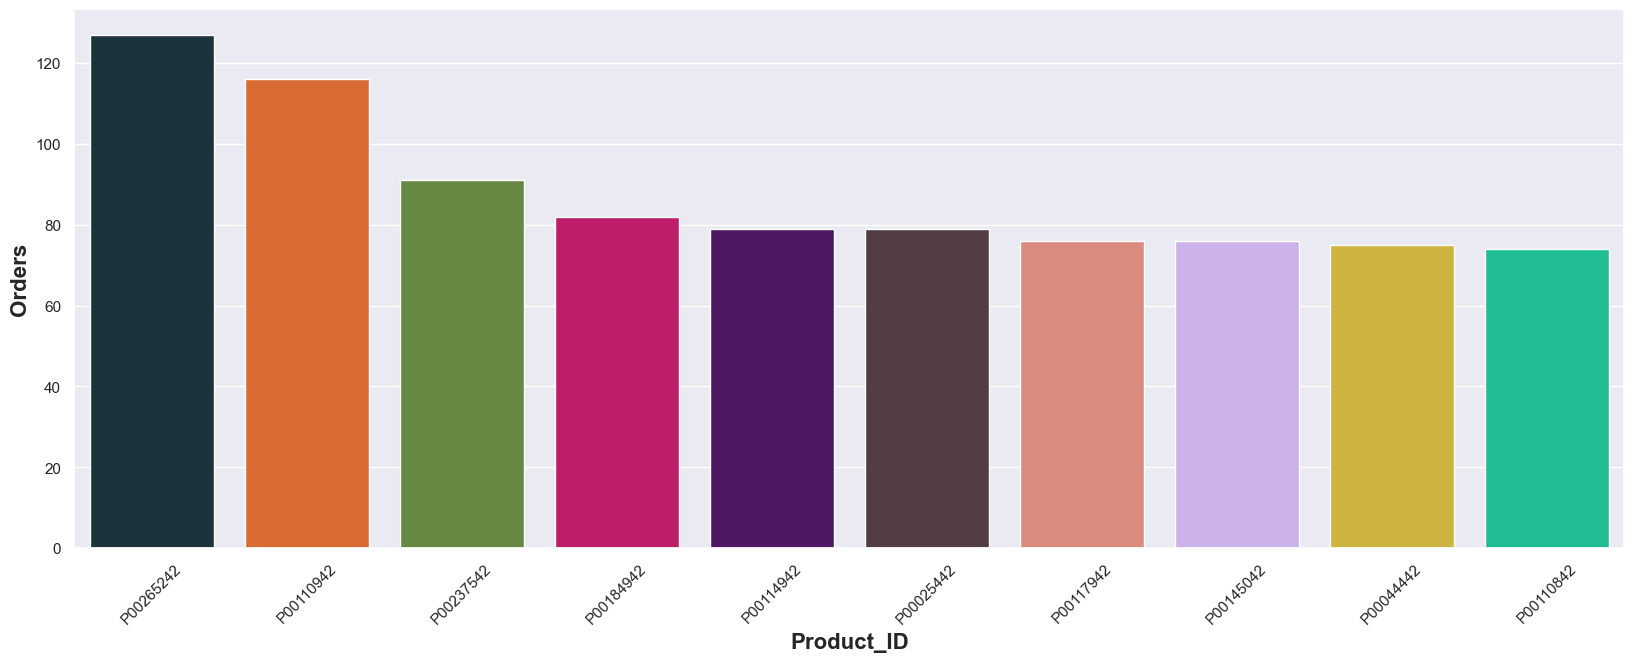

In [71]:
# top 10 most sold products
sales_productID = df_sales_data.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (20,7)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_productID,
           palette = ['#143642','#F56416','#679436','#D90368','#540D6E','#553A41','#E9806E','#CAA8F5','#E6C229','#06D6A0'])

sns.set_style('white')
plt.xlabel("Product_ID", weight = 'bold', fontsize = 16)
plt.ylabel("Orders", weight = 'bold', fontsize = 16)
plt.xticks(rotation = 45)

# **CONCLUSION**
**Married women of age group 26-35 from UP, Maharastra and Karnataka working in IT, Aviation and Healthcare are most likely to buy products in Food, Clothing and Electronics categories**

